In [1]:
import os
import numpy as np
import nibabel


In [2]:
! gdown -- id 

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/gdown/cli.py", line 61, in main
    quiet=args.quiet,
  File "/usr/local/lib/python2.7/dist-packages/gdown/download.py", line 52, in download
    res = sess.get(url, stream=True)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 543, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 516, in request
    prep = self.prepare_request(req)
  File "/usr/local/lib/python2.7/dist-packages/requests/sessions.py", line 459, in prepare_request
    hooks=merge_hooks(request.hooks, self.hooks),
  File "/usr/local/lib/python2.7/dist-packages/requests/models.py", line 314, in prepare
    self.prepare_url(url, params)
  File "/usr/local/lib/python2.7/dist-packages/requests/models.py", line 388, in prepare_url
    raise MissingSchema(error)
requests.e

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
path1 = '/content/drive/MyDrive/ircad-dataset - Copy/ircad-dataset'

In [5]:
import os

In [6]:
training_data = os.path.join(path1,'train')

In [7]:
images = os.listdir(training_data)
images.sort()
images



['ircad_e01_liver.nii.gz',
 'ircad_e01_orig.nii.gz',
 'ircad_e02_liver.nii.gz',
 'ircad_e02_orig.nii.gz',
 'ircad_e03_liver.nii.gz',
 'ircad_e03_orig.nii.gz',
 'ircad_e04_liver.nii.gz',
 'ircad_e04_orig.nii.gz',
 'ircad_e05_liver.nii.gz',
 'ircad_e05_orig.nii.gz',
 'ircad_e06_liver.nii.gz',
 'ircad_e06_orig.nii.gz',
 'ircad_e07_liver.nii.gz',
 'ircad_e07_orig.nii.gz',
 'ircad_e08_liver.nii.gz',
 'ircad_e08_orig.nii.gz',
 'ircad_e09_liver.nii.gz',
 'ircad_e09_orig.nii.gz',
 'ircad_e10_liver.nii.gz',
 'ircad_e10_orig.nii.gz',
 'ircad_e11_liver.nii.gz',
 'ircad_e11_orig.nii.gz',
 'ircad_e12_liver.nii.gz',
 'ircad_e12_orig.nii.gz',
 'ircad_e13_liver.nii.gz',
 'ircad_e13_orig.nii.gz']

In [8]:
train_images = []
train_masks=[]

In [9]:
training_masks = images[0::2]
training_images = images[::2]

In [10]:
training_masks

['ircad_e01_liver.nii.gz',
 'ircad_e02_liver.nii.gz',
 'ircad_e03_liver.nii.gz',
 'ircad_e04_liver.nii.gz',
 'ircad_e05_liver.nii.gz',
 'ircad_e06_liver.nii.gz',
 'ircad_e07_liver.nii.gz',
 'ircad_e08_liver.nii.gz',
 'ircad_e09_liver.nii.gz',
 'ircad_e10_liver.nii.gz',
 'ircad_e11_liver.nii.gz',
 'ircad_e12_liver.nii.gz',
 'ircad_e13_liver.nii.gz']

In [11]:
import nibabel
import numpy as np

In [12]:
image_rows = int(512/2) #undersampling 2D images
image_cols = int(512/2)

for i in range(len(training_masks)):
    print(i)
    training_mask = nibabel.load(os.path.join(training_data,training_masks[i]))
    training_image = nibabel.load(os.path.join(training_data,training_images[i]))
    print(training_mask.shape)
    
    
    for k in range(training_mask.shape[2]):
        #axial cuts are made along z axis with undersampling
        mask_2D = np.array(training_mask.get_fdata()[::2,::2,k])
        image_2D = np.array(training_image.get_fdata()[::2,::2,k])
                                                      
       #getting only 2D sections containing the liver
        # if mask_2D contains only 0 , means there is no liver
        if len(np.unique(mask_2D)) != 1:
            train_masks.append(mask_2D)
            train_images.append(image_2D)    
 
imgs = np.ndarray((len(train_images),image_rows,image_cols),dtype =np.uint8)
imgs_mask = np.ndarray((len(train_masks),image_rows,image_cols),dtype = np.uint8)                                                      
                                                      
for index, img in enumerate(train_images):
    imgs[index,:,:]=img

for index, img in enumerate(train_masks):
    imgs_mask[index,:,:] = img

np.save('train_images.npy',imgs)
np.save('train_masks.npy',imgs_mask)  

                                                      
                                                      
        
    
    

0
(512, 512, 129)
1
(512, 512, 172)
2
(512, 512, 200)
3
(512, 512, 91)
4
(512, 512, 139)
5
(512, 512, 135)
6
(512, 512, 151)
7
(512, 512, 124)
8
(512, 512, 111)
9
(512, 512, 122)
10
(512, 512, 132)
11
(512, 512, 260)
12
(512, 512, 122)


In [13]:
imgs.shape

(1444, 256, 256)

In [14]:
#loading training data
train_images = np.load('train_images.npy')
train_masks = np.load('train_masks.npy')

In [15]:
train_images.shape

(1444, 256, 256)

In [16]:
#creating_test data
test_data = os.path.join(path1,'test')
images = os.listdir(test_data)
test_images=[]
test_masks = []
'liver' in  images[0]



False

In [17]:
train_images.shape

(1444, 256, 256)

In [18]:
#img =nibabel.load(os.path.join(test_data,images[13]))
#img.shape
images


['ircad_e14_orig.nii.gz',
 'ircad_e14_liver.nii.gz',
 'ircad_e15_liver.nii.gz',
 'ircad_e16_liver.nii.gz',
 'ircad_e15_orig.nii.gz',
 'ircad_e16_orig.nii.gz',
 'ircad_e17_liver.nii.gz',
 'ircad_e17_orig.nii.gz',
 'ircad_e18_orig.nii.gz',
 'ircad_e19_liver.nii.gz',
 'ircad_e18_liver.nii.gz',
 'ircad_e20_liver.nii.gz',
 'ircad_e19_orig.nii.gz',
 'ircad_e20_orig.nii.gz']

In [19]:
for image_name in images:
    print(image_name)
    img =nibabel.load(os.path.join(test_data,image_name))
    print(img.shape)
    for k in range(img.shape[2]):
        img_2D = np.array(img.get_fdata()[::2, ::2, k])
        if 'liver' in image_name:
            test_masks.append(img_2D)
            
        elif 'orig' in image_name:
            test_images.append(img_2D)

imgst = np.ndarray((len(test_images),image_rows, image_cols), dtype = np.uint8)
imgs_mskt = np.ndarray((len(test_masks),image_rows,image_cols),dtype = np.uint8)

for index,img in enumerate(test_images):
    imgst[index, :, :] = img
    
for index, img in enumerate(test_masks):
    imgs_mskt[index,:, :] = img

np.save('test_images.npy',imgst)
np.save('test_masks.npy',imgs_mskt)

ircad_e14_orig.nii.gz
(512, 512, 113)
ircad_e14_liver.nii.gz
(512, 512, 113)
ircad_e15_liver.nii.gz
(512, 512, 125)
ircad_e16_liver.nii.gz
(512, 512, 155)
ircad_e15_orig.nii.gz
(512, 512, 125)
ircad_e16_orig.nii.gz
(512, 512, 155)
ircad_e17_liver.nii.gz
(512, 512, 119)
ircad_e17_orig.nii.gz
(512, 512, 119)
ircad_e18_orig.nii.gz
(512, 512, 74)
ircad_e19_liver.nii.gz
(512, 512, 124)
ircad_e18_liver.nii.gz
(512, 512, 74)
ircad_e20_liver.nii.gz
(512, 512, 225)
ircad_e19_orig.nii.gz
(512, 512, 124)
ircad_e20_orig.nii.gz
(512, 512, 225)


In [20]:
#loading test data
test_images = np.load('test_images.npy')
test_masks = np.load('test_masks.npy')

In [21]:
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from skimage.exposure import rescale_intensity
from keras.callbacks import History
from skimage import io
import tensorflow as tf


In [22]:
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = int(512/2)
img_cols = int(512/2)
smooth = 1.
#We divide here the number of rows and columns by two because we undersample our data (We take one pixel over two)


In [23]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    binary_crossentropy  = tf.keras.losses.BinaryCrossentropy(from_logits = False)
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [24]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(learning_rate=1e-3), loss=loss, metrics=[dice_coefficient])
    return model

#The different layers in our neural network model (including convolutions, maxpooling and upsampling)

In [25]:
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p

#We adapt here our dataset samples dimension so that we can feed it to our network

In [26]:
import matplotlib.pyplot as plt


In [27]:
def train_and_predict():

    imgs_train = preprocess(train_images)
    imgs_mask_train = preprocess(train_masks)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std
    #Normalization of the train set

    imgs_mask_train = imgs_mask_train.astype('float32')

    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
    #Saving the weights and the loss of the best predictions we obtained

    history=model.fit(imgs_train, imgs_mask_train, batch_size=10, epochs=20, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])

   
    imgs_test = preprocess(test_images)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std
    #Normalization of the test set
    model.load_weights('weights.h5')

    imgs_mask_test = model.predict(imgs_test, verbose=1)
    imgs_mask_test=imgs_mask_test.astype('uint8')
    np.save('imgs_mask_test.npy', imgs_mask_test)

    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)

    for k in range(len(imgs_mask_test)):
        a=rescale_intensity(imgs_test[k][:,:,0],out_range=(-1,1))
        b=(imgs_mask_test[k][:,:,0]).astype('uint8')
        io.imsave(os.path.join(pred_dir, str(k) + '_pred.png'),mark_boundaries(a,b))
    #Saving our predictions in the directory 'preds'
    plt.plot(history.history['dice_coefficient'])
    plt.plot(history.history['val_dice_coefficient'])
    plt.title('Model dice coeff')
    plt.ylabel('Dice coeff')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    #plotting our dice coeff results in function of the number of epochs

Epoch 1/20
116/116 [==============================] - 51s 424ms/step - loss: 0.3795 - dice_coefficient: 0.8430 - val_loss: 0.0039 - val_dice_coefficient: 0.9965
Epoch 2/20
116/116 [==============================] - 49s 421ms/step - loss: 0.0012 - dice_coefficient: 0.9990 - val_loss: 5.9065e-04 - val_dice_coefficient: 0.9995
Epoch 3/20
116/116 [==============================] - 49s 422ms/step - loss: 1.7706e-04 - dice_coefficient: 0.9999 - val_loss: 1.3876e-04 - val_dice_coefficient: 0.9999
Epoch 4/20
116/116 [==============================] - 49s 423ms/step - loss: 5.4699e-05 - dice_coefficient: 1.0000 - val_loss: 5.7945e-05 - val_dice_coefficient: 0.9999
Epoch 5/20
116/116 [==============================] - 49s 422ms/step - loss: 2.5753e-05 - dice_coefficient: 1.0000 - val_loss: 3.4741e-05 - val_dice_coefficient: 1.0000
Epoch 6/20
116/116 [==============================] - 49s 423ms/step - loss: 1.4226e-05 - dice_coefficient: 1.0000 - val_loss: 1.6435e-05 - val_dice_coefficient: 1.000

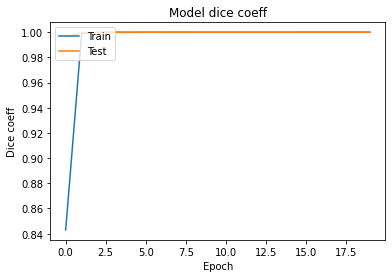

In [29]:
train_and_predict()

In [ ]:
  plt.imshow(np.load('imgs_mask_test[1].npy'))

In [ ]:
img_ = np.load('imgs_mask_test.npy')

In [ ]:
img1 = np.load('test_images.npy')
img1.shape

In [ ]:
plt.imshow(img1[9,:,:])
plt.show()

In [ ]:
plt.imshow(img_[:,:,:,0])
plt.show()